# Importation  et inspection des données

In [ ]:
#Tout d'abord,chargeons le fichier
D<-read.table('fromage.txt',sep="\t",dec=".",header=TRUE)
#afficher la structure des variables
str(D)

'data.frame':	29 obs. of  4 variables:
 $ sodium   : num  354 238 112 336 314 ...
 $ calcium  : num  72.6 209.8 259.4 211.1 215.9 ...
 $ lipides  : num  26.3 25.1 33.3 28.9 19.5 28.8 27.9 25.4 32.5 32.4 ...
 $ proteines: num  21 22.6 26.6 20.2 23.4 23 19.5 17.8 26 29.2 ...


In [ ]:
#affichons les premières lignes
head(D)

sodium,calcium,lipides,proteines
353.5,72.6,26.3,21.0
238.0,209.8,25.1,22.6
112.0,259.4,33.3,26.6
336.0,211.1,28.9,20.2
314.0,215.9,19.5,23.4
256.0,264.0,28.8,23.0


# nuages par pairs

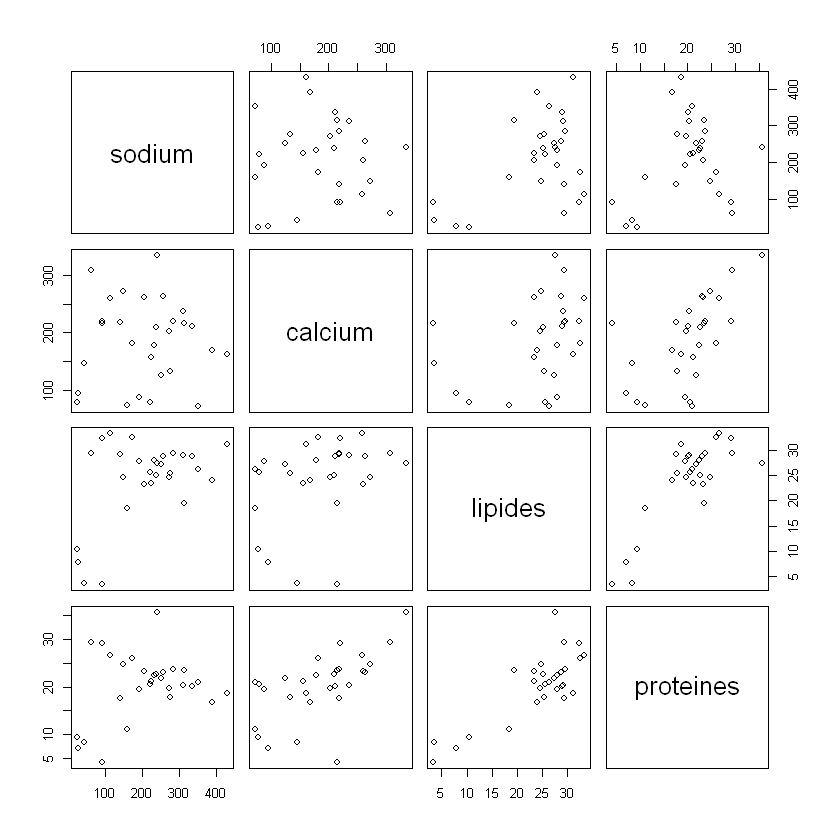

In [ ]:
#Pour voir les points qui sont proches dans l'espace d'observation
pairs(D)
#l'idée c'est toujours trouver des blocs et voir aussi s'il y a des corrélations entre les variables.

On voit clairement que la variable proteines et lipides sont liées positivement 
(quand la teneur en proteines augmente la teneur en lipides augmente également)

Mais c'est pas facile de trouver des groupes(clustes) en se basant juste sur ce graphique là.

# moyennes des variables

In [ ]:
print(colMeans(D))

   sodium   calcium   lipides proteines 
210.08621 185.73448  24.15862  20.16897 


Les valeurs pour les quatres variables dans le jeu de données fromage ne sont pas sur la même échelle.

En effet leurs moyennes et écarts-types empiriques ne sont pas similaires.

alors on doit les standariser (les normaliser) par une fonction s'appelle scale.

# centrage-réduction

In [ ]:
z<-scale(D)
print(colMeans(z))

       sodium       calcium       lipides     proteines 
 8.637727e-17  4.570099e-17 -8.207037e-17  1.327363e-16 


Les valeurs dans chacune des colonnes de z ont une moyenne presque 0 et un écart-type de 1.

Elles sont donc sur la même échelle.

In [ ]:
#calcul des écarts-type sur les variables transformées
apply(z,2,sd)

sodium   calcium   lipides proteines 
        1         1         1         1

# K-Means et interprétations

In [ ]:
#k-means avec 2 groupes
res<-kmeans(z,centers=2)
print(res)

K-means clustering with 2 clusters of sizes 24, 5

Cluster means:
      sodium    calcium   lipides  proteines
1  0.2727572  0.1843360  0.395636  0.3648628
2 -1.3092346 -0.8848128 -1.899053 -1.7513416

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2

Within cluster sum of squares by cluster:
[1] 49.770416  6.823948
 (between_SS / total_SS =  49.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


- Inertie intra classe(heterogenite des classes)
- qualite de partitionnement=Inertie explique par le partitionnement/Inertie totale

# Groupes d'appartenance

In [ ]:
#liste des clusters
print(res$cluster)

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2


In [ ]:
#effectifs par groupe
print(table(res$cluster))


 1  2 
24  5 


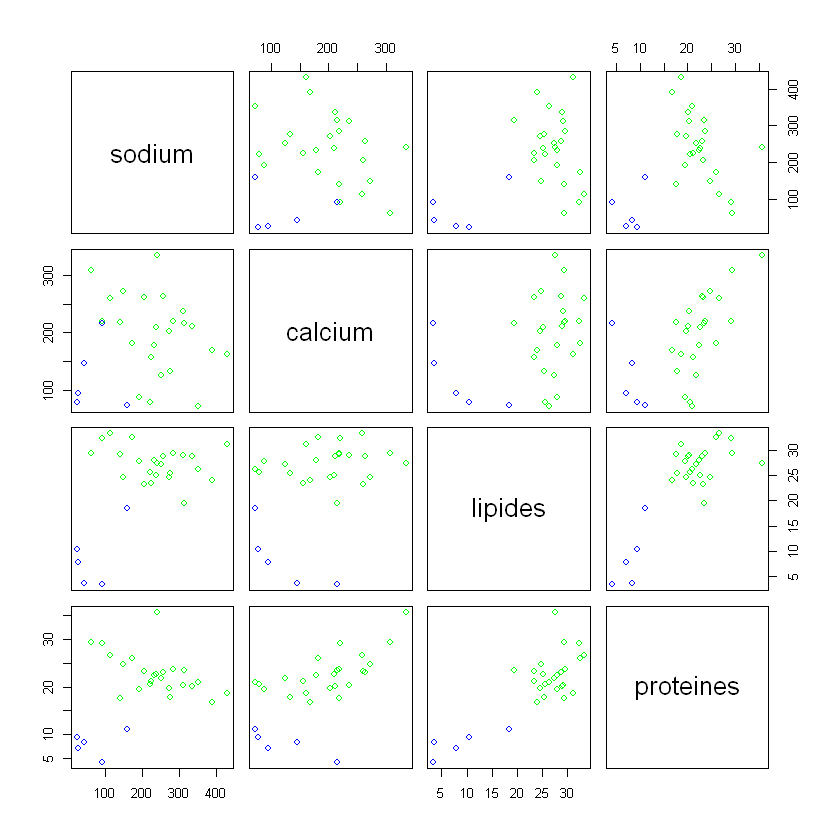

In [ ]:
#configuration des points
pairs(D,col=c('green','blue')[res$cluster])

Donc effectivement ce qu'on avait intuitivement compris quand on a fait le graphique est confirmes par le calcul

- les 2 groupes se demarquent bien sur les proteines et les lipides

- Pour les 2 autres variables c'est difficile de les décerner

# calcul des moyennes conditionnelles

In [ ]:
#calcul des moyennes conditionnelles
print(aggregate(x=D,by=list(res$cluster),FUN=mean))

  Group.1   sodium  calcium lipides proteines
1       1 239.7292 199.1042  27.375  22.70833
2       2  67.8000 121.5600   8.720   7.98000


C'est un calcul conditionnelle sur D(les variables{sodium,calcium,lipides,proteines}) 
regroupées selon l'appartenance au cluster et la fonction appliquée à chaque groupe d'individus c'est la fonction moyenne.


On voit que les fromages du groupe 2 ont en moyenne une teneur en proteines 7.98 et pour le groupe 1 une teneur de 22.70

# Détection du nombre de groupes

Comment detecter le nbr de groupes?

Il y a plusieurs techniques mais la plus simple reste la regle du coude (je fais evoluer le nbr de groupes et je surveille
                                                                    l'evolution d'un critere de qualite de partitionnement)

- Le critere le plus interessant qui est en relation directe avec la methode c'est le rapport entre l'inertie inter et totale.
(Inertie expliquee)

In [ ]:
#identification du nombre de groupes
BT<-c()    #creation d'un vecteur où on va récolter les résultats
for (k in 1:10){      #là on va évoluer le nombre de cluster de 1 à 10
    tmp<-kmeans(z,centers=k)
    BT[k]<-tmp$betweenss/tmp$totss  #dans le vecteur BT a l'indice k je fais le rapport(inertie inter-classe/inertie totale)
}
#affichage
print(BT)

 [1] 0.0000000 0.4946932 0.6880427 0.7538895 0.7960392 0.8273518 0.8507465
 [8] 0.8788462 0.8892754 0.8880534


Quand le nombre de groupe égale à 1 le ratio égale à 0 ensuite il évolue et il augmente
tout le temps jusqu'à on arrive à 29 où la valeur égale à 1

Mais la question ici c'est: quand le ratio n'est plus intéressant?

c'est pour cela qu'on doit faire un graphique représentant les résultats obtenus

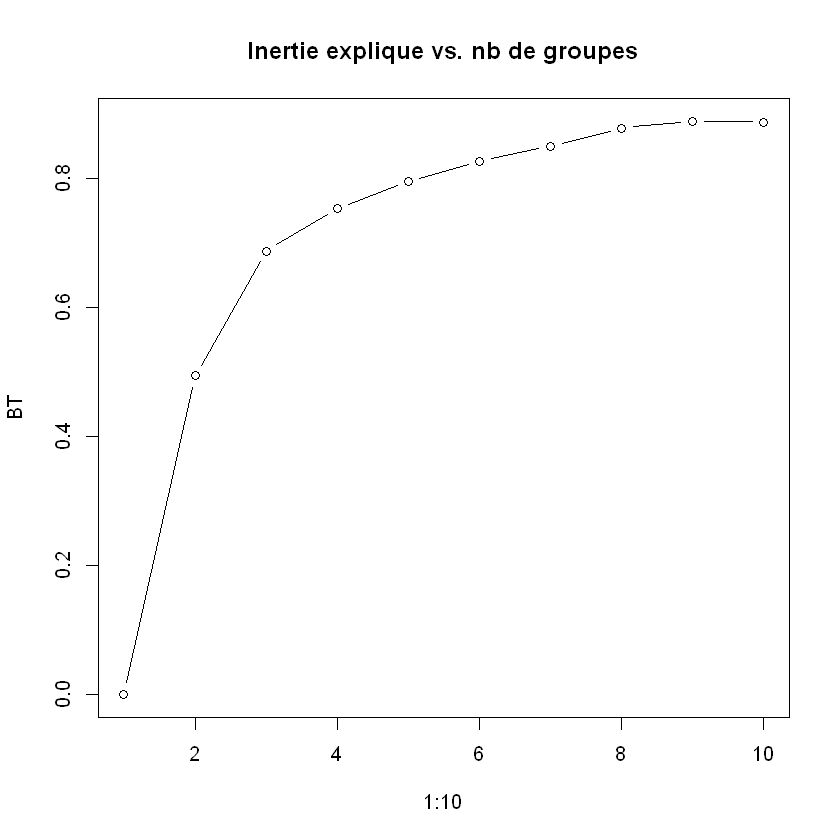

In [ ]:
#graphique
plot(1:10,BT,type='b',main='Inertie explique vs. nb de groupes')


- En fait quand on passe à deux groupes on gagne beaucoup.

- Quand on passe à 3 groupes on gagne toujours moins mais on gagne quand meme ce qui parait interessant dans le graphique.

- Quand je passe de 3 à 4 on voit qu'il est de plus en plus horizontal et que le gain est moins interressant

- Alors il y a deux solutions c'est une solution  2 groupes ou bien une soltion à 3 groupes

# Partition en 3 classes

In [ ]:
#K-means à 3 classes
resBis<-kmeans(z,centers=3)
print(resBis)

K-means clustering with 3 clusters of sizes 15, 9, 5

Cluster means:
      sodium    calcium    lipides   proteines
1  0.7221314 -0.3012292  0.2740645  0.06672155
2 -0.4761997  0.9936113  0.5982553  0.86176495
3 -1.3092346 -0.8848128 -1.8990529 -1.75134156

Clustering vector:
 [1] 1 1 2 1 1 2 1 1 2 2 1 2 2 3 1 3 3 1 1 2 3 1 1 1 1 2 1 2 3

Within cluster sum of squares by cluster:
[1] 16.157411 11.957863  6.823948
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


# Graphique 

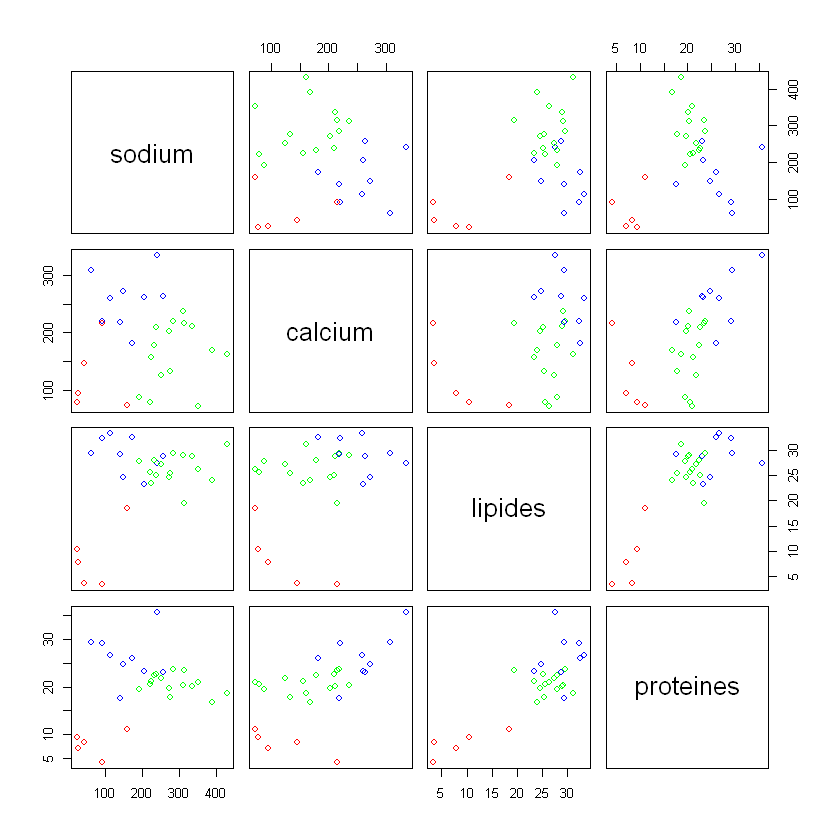

In [ ]:
#configuration des points
pairs(D,col=c('green','blue','red')[resBis$cluster])